In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2010-1-9'
end = '2024-1-21'
stock = 'TSLA'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [6]:
data.reset_index(inplace = True)


In [7]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29 00:00:00+00:00,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30 00:00:00+00:00,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01 00:00:00+00:00,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02 00:00:00+00:00,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06 00:00:00+00:00,1.074000,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...,...,...
3408,2024-01-12 00:00:00+00:00,218.889999,218.889999,225.339996,217.149994,220.080002,122889000
3409,2024-01-16 00:00:00+00:00,219.910004,219.910004,223.490005,212.179993,215.100006,115355000
3410,2024-01-17 00:00:00+00:00,215.550003,215.550003,215.669998,212.009995,214.860001,103164400


In [11]:
MAvg_100days = data.Close.rolling(100).mean()

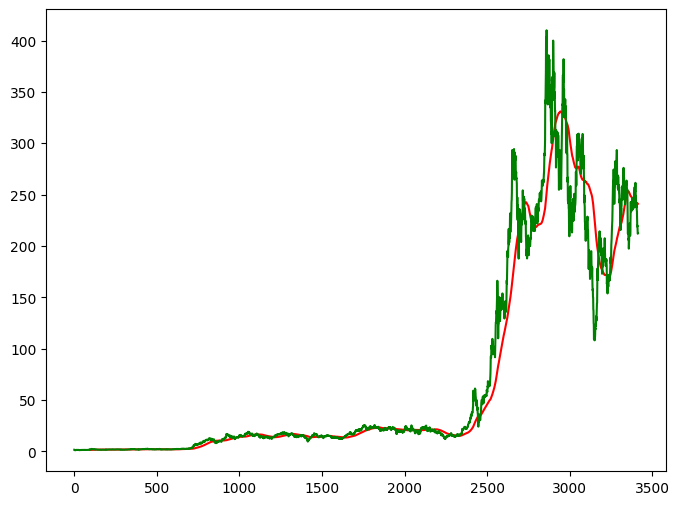

In [12]:
plt.figure(figsize=(8,6))
plt.plot(MAvg_100days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [15]:
MAvg_200days = data.Close.rolling(200).mean()

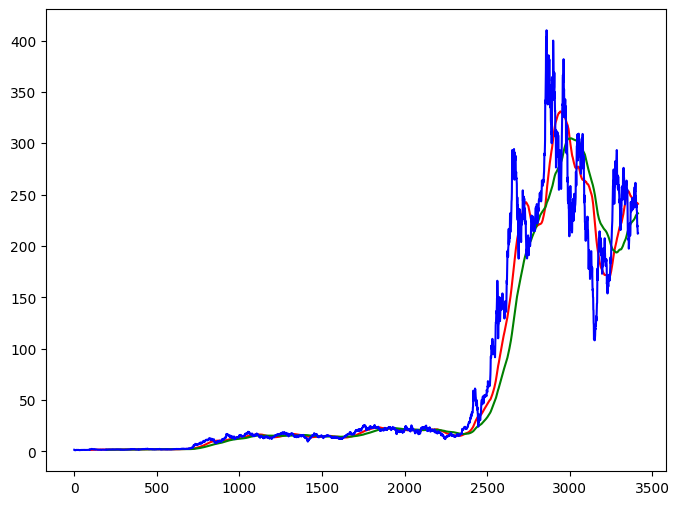

In [17]:
plt.figure(figsize=(8,6))
plt.plot(MAvg_100days, 'r')
plt.plot(MAvg_200days, 'g')
plt.plot(data.Close, 'b')
plt.show()

In [18]:
data.dropna(inplace=True)

In [25]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.84)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.84): len(data)])



In [23]:
data_train.shape[0]

2866

In [26]:
data_test.shape[0]


547

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [28]:
data_train_scale = scaler.fit_transform(data_train)

In [35]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

x, y = np.array(x), np.array(y)

In [34]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [37]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units =80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))


In [38]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [39]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose =1)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 25s 162ms/step - loss: 0.0143
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 156ms/step - loss: 0.0033
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - loss: 0.0018
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - loss: 0.0019
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 158ms/step - loss: 0.0018
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 157ms/step - loss: 0.0020
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 155ms/step - loss: 0.0014
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - loss: 0.0019
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - loss: 0.0019
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 13s 154ms/step - loss: 0.0021
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 155ms/step - loss: 0.0013
Epoch 12/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 157ms/step - loss: 0.0015
Epoch 13/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - loss: 0.0016
Epoch 14/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 21s 176ms/step - loss: 0.0017
Epoch 15/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 

In [40]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [41]:
pass_100days = data_train.tail(100)


In [42]:
data_test = pd.concat([pass_100days, data_test], ignore_index = True)

In [45]:
data_test_scale = scaler.fit_transform(data_test)

In [46]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)

In [47]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step


In [51]:
scale=1/scaler.scale_

In [52]:
y_predict = y_predict*scale

In [53]:
y = y*scale

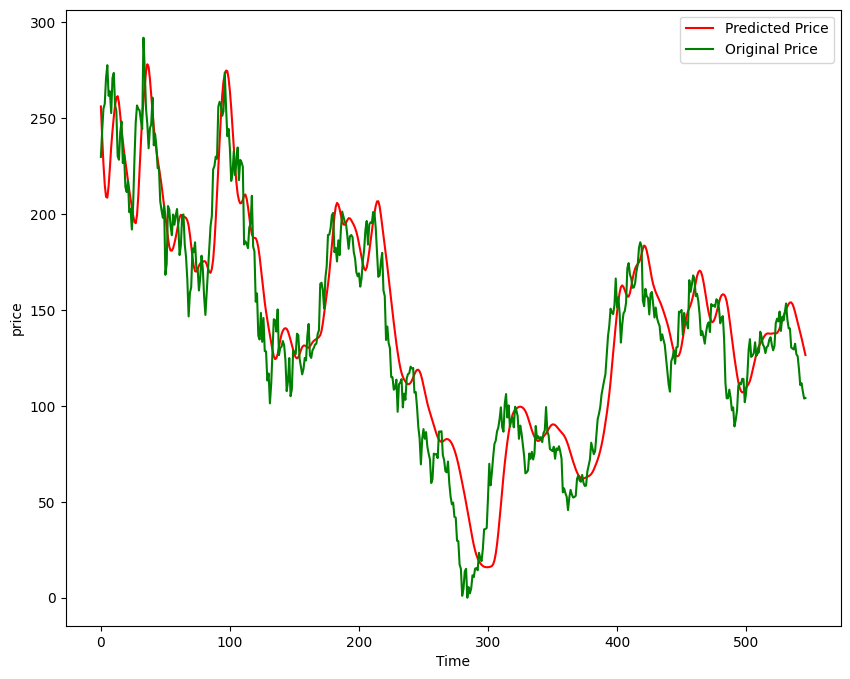

In [55]:
plt.figure(figsize =(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('price')
plt.legend()
plt.show()